In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
tit = pd.read_csv(r"tested.csv")

In [7]:
# Load the dataset 
tit = pd.read_csv(r"tested.csv")

In [9]:
# First few rows of the data
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
# Checking for missing value 
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# Drop irrelevant columns
tit.drop(["PassengerId","Cabin","Embarked","Name","Ticket"],axis=1,inplace=True)

In [15]:
# Filling the missing value for age with median
tit["Age"].fillna(tit["Age"].median(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12788\3586590202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tit["Age"].fillna(tit["Age"].median(),inplace=True)


In [17]:
# Fill the missing value in fare with mean
tit["Fare"].fillna(tit["Fare"].mean(),inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12788\2753208903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tit["Fare"].fillna(tit["Fare"].mean(),inplace=True)


In [19]:
# Checking for missing value 
tit.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [21]:
# Converting male to 1 and female to 0
tit["Sex"] = tit["Sex"].map({"male":1,"female":0})

In [23]:
correlation_matrix = tit.corr()
print("\nCorrelation Matrix:", correlation_matrix)


Correlation Matrix:           Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.108615 -1.000000  0.008035  0.099943  0.159120  0.191382
Pclass   -0.108615  1.000000  0.108615 -0.467853  0.001087  0.018721 -0.576619
Sex      -1.000000  0.108615  1.000000 -0.008035 -0.099943 -0.159120 -0.191382
Age       0.008035 -0.467853 -0.008035  1.000000 -0.071197 -0.043731  0.344627
SibSp     0.099943  0.001087 -0.099943 -0.071197  1.000000  0.306895  0.171488
Parch     0.159120  0.018721 -0.159120 -0.043731  0.306895  1.000000  0.230001
Fare      0.191382 -0.576619 -0.191382  0.344627  0.171488  0.230001  1.000000


<Axes: >

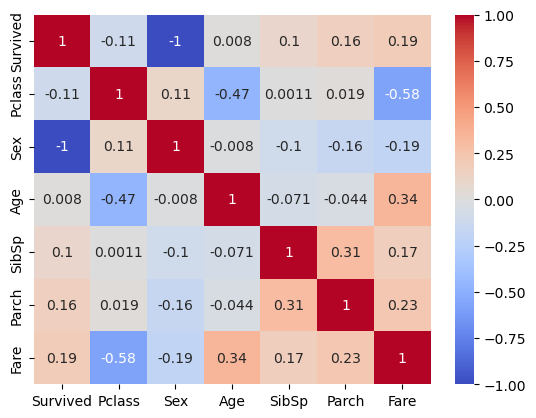

In [25]:
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

<Axes: >

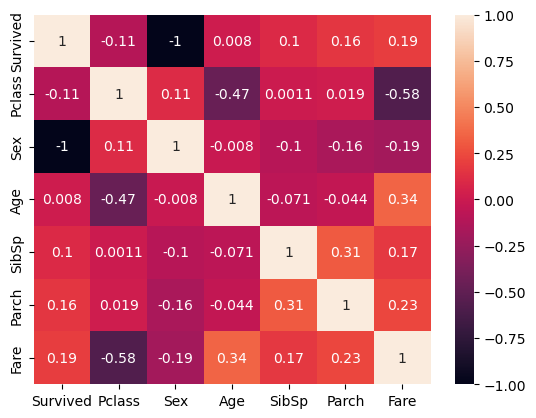

In [29]:
sns.heatmap(correlation_matrix,annot=True)

In [31]:
# Ttest
survived_ages = tit[tit['Survived'] == 1]['Age']
not_survived_ages = tit[tit['Survived'] == 0]['Age']

In [33]:
t_stat, p_value = stats.ttest_ind(survived_ages, not_survived_ages, equal_var=False) # Welch's t-test
print(f"\nT-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = 0.15612787799760547, p-value = 0.8760484203437442


In [35]:
# Contigency table
contingency_table = pd.crosstab(tit['Sex'], tit['Survived'])
print(contingency_table)

Survived    0    1
Sex               
0           0  152
1         266    0


In [37]:
# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test: chi2 = {chi2}, p-value = {p}")


Chi-square test: chi2 = 413.6897405343716, p-value = 5.767311139789629e-92


In [39]:
#ANOVA test
grouped_fares = []
for pclass in tit['Pclass'].unique():
    grouped_fares.append(tit[tit['Pclass'] == pclass]['Fare'])
f_stat, p_value = stats.f_oneway(*grouped_fares)
print(f"\nANOVA test: f-statistic = {f_stat}, p-value = {p_value}")


ANOVA test: f-statistic = 129.9799750435851, p-value = 1.4784077864303194e-44


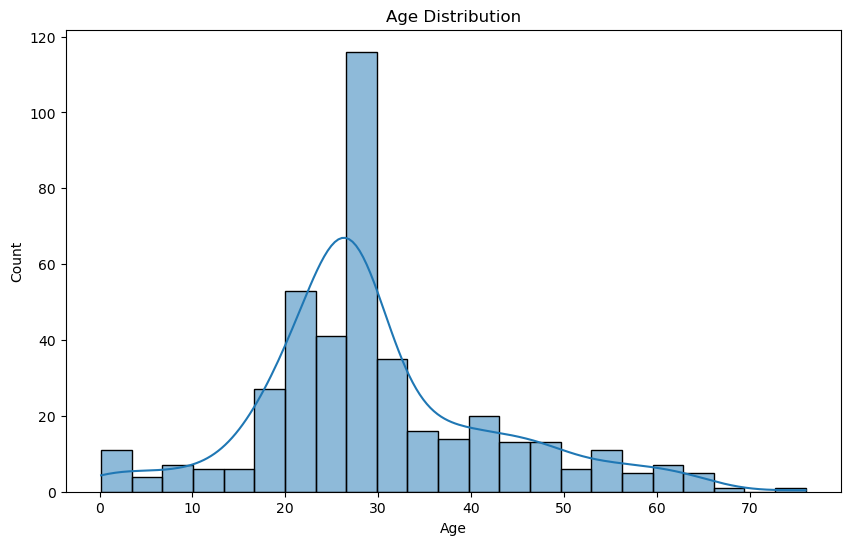

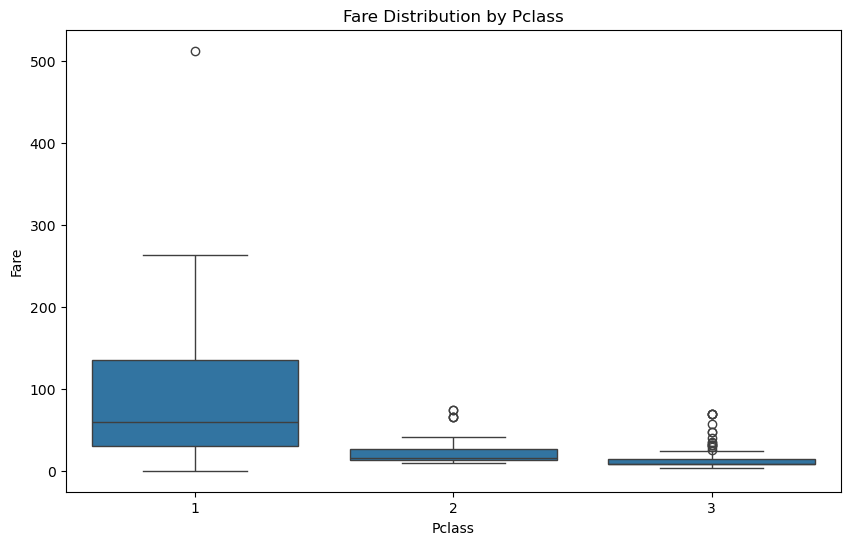

In [41]:
# 4. Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(tit['Age'], kde=True)
plt.title("Age Distribution")
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=tit)
plt.title("Fare Distribution by Pclass")
plt.show()

In [43]:
# 5. Cross-Tabulation and Contingency Tables
print("\nCross-Tabulation: Pclass vs. Survived")
print(pd.crosstab(tit['Pclass'], tit['Survived']))


Cross-Tabulation: Pclass vs. Survived
Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72


In [45]:
# 6. Confidence Intervals (for survival rate of females)
female_survivors = tit[(tit['Sex'] == 0) & (tit['Survived'] == 1)]
female_total = tit[tit['Sex'] == 0]
survival_rate = len(female_survivors) / len(female_total)

In [47]:
# Calculate confidence interval (using a simple normal approximation)
import numpy as np
import scipy.stats as st
confidence_interval = st.t.interval(0.95, len(female_total)-1, loc=survival_rate,
scale=st.sem(female_total['Survived']))
print(f"\nConfidence Interval for Female Survival Rate (95%): {confidence_interval}")


Confidence Interval for Female Survival Rate (95%): (nan, nan)


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


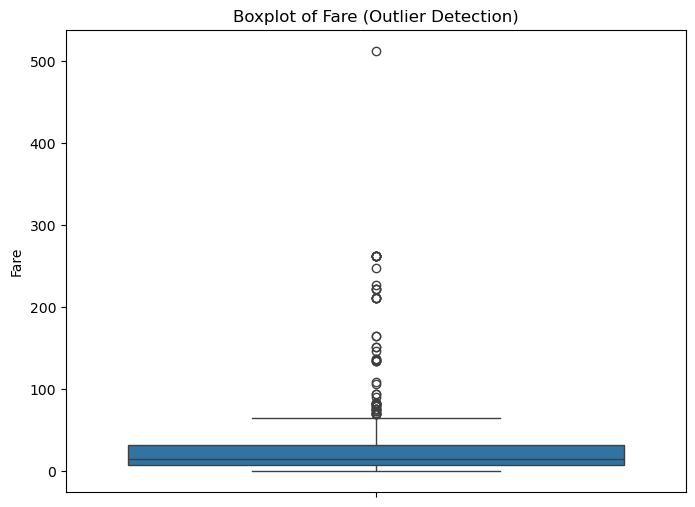

In [49]:
# 7. Outlier Detection (using boxplots)
plt.figure(figsize=(8, 6))
sns.boxplot(y=tit['Fare'])
plt.title("Boxplot of Fare (Outlier Detection)")
plt.show()

In [51]:
# Z-score outlier detection for age
z_scores = np.abs(stats.zscore(tit['Age']))
outliers = tit[z_scores > 3] #Using 3 as a threshold
print("\nAge Outliers (Z-score > 3):")
print(outliers)


Age Outliers (Z-score > 3):
    Survived  Pclass  Sex   Age  SibSp  Parch   Fare
96         1       1    0  76.0      1      0  78.85


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Prepare the data for modeling
X = tit.drop('Survived', axis=1)
y = tit['Survived']

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest Classifier
kenya = RandomForestClassifier(random_state=42)


In [65]:
kenya.fit(X_train, y_train)
# Get feature importances
importances = kenya.feature_importances_


Feature Importances:


NameError: name 'feature_importances' is not defined

In [67]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


In [69]:
# Print feature importances
print("Feature Importances:")
print(feature_importances)

Feature Importances:
  Feature  Importance
1     Sex    0.882998
5    Fare    0.052182
2     Age    0.029028
4   Parch    0.017155
3   SibSp    0.012337
0  Pclass    0.006301


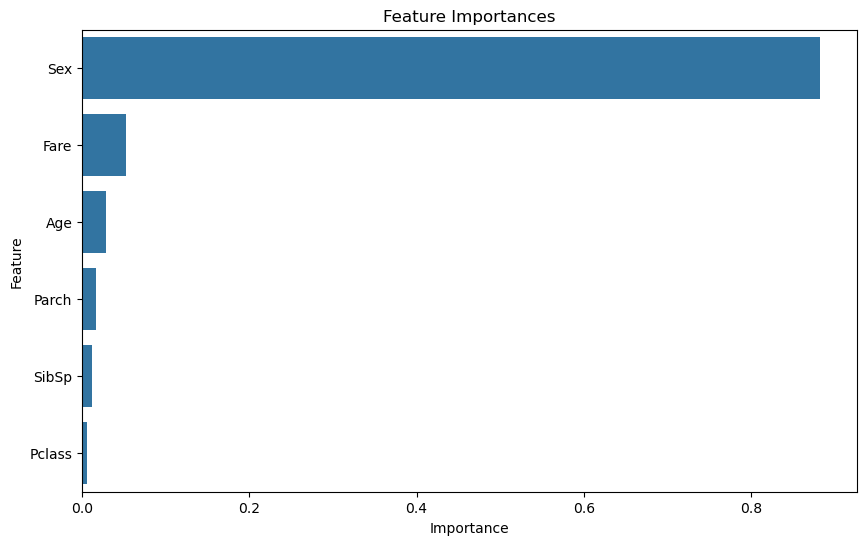

In [71]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()